# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

output_df = pd.read_csv(output_data_file)
output_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

# set up lists to hold values
new_cities = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
count = 0

# Build query URL
query_url = f"{url}appid={weather_api_key}&q={city}"
# print(query_url)

print("Beginning Data Retrieval")
print("------------------------")

# loop through cities to perform a weather check
for city in cities:

    # Build query URL based on each city
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=Imperial"

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
#     print(weather_json)

    # Try & Except clause to catch any NaN cities
    try:
    # Append values to the previously defined lists
        latitude.append(weather_json["coord"]["lat"])
        longitude.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        new_cities.append(city)
    
        # Counter to track city #'s
        count = count + 1
        print(f"Processing Record {count}: {city}")

    except KeyError:
        print(f"City not found. Skipping...")
    
print("------------------------")
print("Data Retrieval Complete")

Beginning Data Retrieval
------------------------
Processing Record 1: punta arenas
City not found. Skipping...
Processing Record 2: gornyy
Processing Record 3: aguimes
Processing Record 4: baker city
Processing Record 5: itarema
Processing Record 6: ushuaia
Processing Record 7: new norfolk
Processing Record 8: port lincoln
Processing Record 9: rikitea
Processing Record 10: arraial do cabo
Processing Record 11: leningradskiy
Processing Record 12: norman wells
Processing Record 13: swellendam
Processing Record 14: saint george
Processing Record 15: jamestown
Processing Record 16: kapaa
Processing Record 17: ilulissat
Processing Record 18: muravlenko
Processing Record 19: saskylakh
Processing Record 20: bluff
Processing Record 21: vardo
Processing Record 22: athens
Processing Record 23: busselton
City not found. Skipping...
Processing Record 24: victoria
Processing Record 25: esperance
Processing Record 26: sanandaj
Processing Record 27: yellowknife
Processing Record 28: belyy yar
Proces

Processing Record 233: pisco
Processing Record 234: mangla
Processing Record 235: termoli
Processing Record 236: kurtamysh
Processing Record 237: haines junction
Processing Record 238: bekovo
Processing Record 239: longyearbyen
Processing Record 240: bonavista
Processing Record 241: sutysky
Processing Record 242: lujan
Processing Record 243: uige
Processing Record 244: nemuro
Processing Record 245: sola
Processing Record 246: razdolnoye
Processing Record 247: tuy hoa
Processing Record 248: dawei
Processing Record 249: ahipara
Processing Record 250: saint anthony
Processing Record 251: port elizabeth
Processing Record 252: grindavik
Processing Record 253: isangel
Processing Record 254: aginskoye
Processing Record 255: makat
Processing Record 256: fairbanks
Processing Record 257: takoradi
Processing Record 258: plettenberg bay
Processing Record 259: roquetas de mar
Processing Record 260: vostok
Processing Record 261: sobolevo
Processing Record 262: lishui
Processing Record 263: nanortali

City not found. Skipping...
Processing Record 473: bosaso
City not found. Skipping...
City not found. Skipping...
Processing Record 474: cururupu
City not found. Skipping...
Processing Record 475: agadir
Processing Record 476: jalu
Processing Record 477: ondjiva
Processing Record 478: wajima
Processing Record 479: cabo san lucas
Processing Record 480: port blair
Processing Record 481: bamako
Processing Record 482: osa
Processing Record 483: khovu-aksy
Processing Record 484: okato
Processing Record 485: guaimaro
Processing Record 486: hami
Processing Record 487: cidreira
Processing Record 488: bardiyah
Processing Record 489: hobyo
Processing Record 490: hella
Processing Record 491: bykovo
Processing Record 492: pali
Processing Record 493: baie-comeau
Processing Record 494: kathu
Processing Record 495: vestmannaeyjar
Processing Record 496: salinas
Processing Record 497: ust-tsilma
Processing Record 498: denizli
Processing Record 499: oksbol
Processing Record 500: meulaboh
City not found.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date
weather_dict = {
    "City": new_cities,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.15,-70.92,39.20,80,20,10.29,CL,1587204927
1,gornyy,55.12,83.91,52.47,49,0,8.86,RU,1587204928
2,aguimes,27.91,-15.45,66.99,77,75,13.87,ES,1587204928
3,baker city,44.77,-117.83,28.40,74,1,1.83,US,1587204928
4,itarema,-2.92,-39.92,74.44,90,28,3.49,BR,1587204928
...,...,...,...,...,...,...,...,...,...
544,manokwari,-0.87,134.08,82.72,75,89,5.08,ID,1587205011
545,lubango,-14.92,13.49,66.20,42,40,18.34,AO,1587204967
546,ambilobe,-13.20,49.05,89.58,44,78,7.05,MG,1587205011
547,huinan,42.62,126.26,62.33,29,61,4.92,CN,1587205012


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,21.086011,16.464426,60.338944,68.178506,53.979964,8.029763,1.587205e+09
std,33.669076,91.230889,22.377363,22.413846,38.152182,5.531962,5.446527e+01
min,-54.800000,-179.170000,-8.900000,1.000000,0.000000,0.380000,1.587205e+09
25%,-8.140000,-64.180000,45.000000,54.000000,18.000000,3.940000,1.587205e+09
50%,27.040000,20.040000,64.400000,73.000000,59.000000,6.930000,1.587205e+09
75%,50.060000,96.130000,77.000000,86.000000,91.000000,10.710000,1.587205e+09
max,78.220000,179.320000,105.890000,100.000000,100.000000,33.550000,1.587205e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [7]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_data.to_csv('weather_data.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The max temperature peaks between -20 & 20 degs Latitude, and southern latitudes are cold this time of year


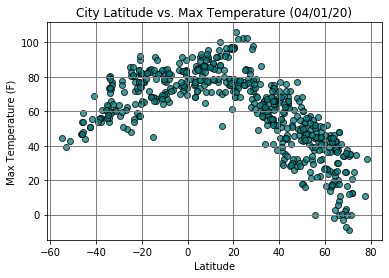

In [8]:
# Define x- and y-axis
lat_axis = weather_data["Lat"]
temp_axis = weather_data["Max Temp"]

# Create the scatter plot
plt.scatter(lat_axis, temp_axis, marker="o", facecolors="teal", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.show

# Save image as PNG
plt.savefig("Fig1.png")

# Brief analysis
print("The max temperature peaks between -20 & 20 degs Latitude, and southern latitudes are cold this time of year")

## Latitude vs. Humidity Plot

Humidity varies at upper and lower latitudes, but tends to cluster around 60-100% near the equator.


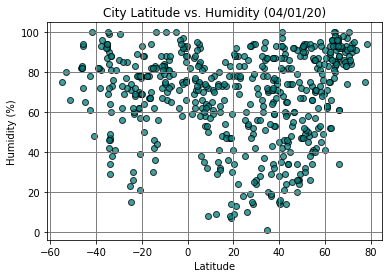

In [9]:
# Define x- and y-axis
lat_axis = weather_data["Lat"]
humidity_axis = weather_data["Humidity"]

# Create the scatter plot
plt.scatter(lat_axis, humidity_axis, marker="o", facecolors="teal", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.show

# Save image as PNG
plt.savefig("Fig2.png")

# Brief analysis
print("Humidity varies at upper and lower latitudes, but tends to cluster around 60-100% near the equator.")

## Latitude vs. Cloudiness Plot

It's tough to draw any meaningful conclusion from comparing latitude and cloudiness.


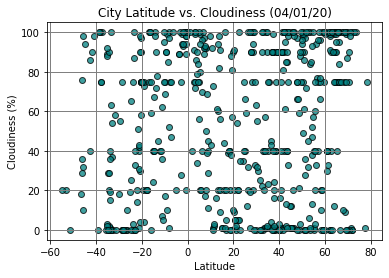

In [10]:
# Define x- and y-axis
lat_axis = weather_data["Lat"]
cloudy_axis = weather_data["Cloudiness"]

# Create the scatter plot
plt.scatter(lat_axis, cloudy_axis, marker="o", facecolors="teal", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.show

# Save image as PNG
plt.savefig("Fig3.png")

# Brief analysis
print("It's tough to draw any meaningful conclusion from comparing latitude and cloudiness.")

## Latitude vs. Wind Speed Plot

It is generally windier in southern latitudes this time of year.


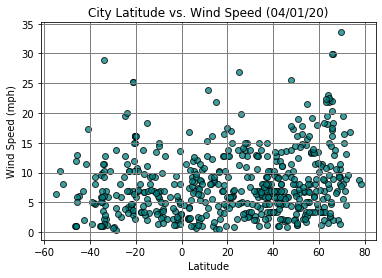

In [11]:
# Define x- and y-axis
lat_axis = weather_data["Lat"]
windy_axis = weather_data["Wind Speed"]

# Create the scatter plot
plt.scatter(lat_axis, windy_axis, marker="o", facecolors="teal", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.show

# Save image as PNG
plt.savefig("Fig4.png")

# Brief analysis
print("It is generally windier in southern latitudes this time of year.")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [12]:
# Create Northern and Southern Hemisphere DataFrames

northern_df = weather_data.loc[weather_data['Lat'] >= 0]
southern_df = weather_data.loc[weather_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

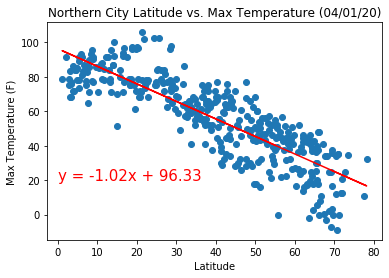

The r-squared is: 0.7118185555778351


<Figure size 432x288 with 0 Axes>

In [14]:
# Perform a linear regression on max temp versus latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"], northern_df["Max Temp"])

# Create equation of line to calculate predicted max temp
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(northern_df["Lat"],northern_df["Max Temp"])
plt.plot(northern_df["Lat"],regress_values,"-", color="r")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.title("Northern City Latitude vs. Max Temperature (04/01/20)")
plt.show()

print(f"The r-squared is: {rvalue**2}")

# Save image as PNG
plt.savefig("Fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

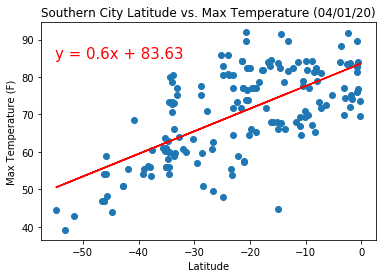

The r-squared is: 0.4343424980510785
These charts show the positive (for southern cities) and negative (for norther cities) correlations between city latitude and max temps.


<Figure size 432x288 with 0 Axes>

In [16]:
# Perform a linear regression on max temp versus latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"], southern_df["Max Temp"])

# Create equation of line to calculate predicted max temp
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(southern_df["Lat"],southern_df["Max Temp"])
plt.plot(southern_df["Lat"],regress_values,"-", color="r")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.title("Southern City Latitude vs. Max Temperature (04/01/20)")
plt.show()

print(f"The r-squared is: {rvalue**2}")

# Brief analysis
print("These charts show the positive (for southern cities) and negative (for norther cities) correlations between city latitude and max temps.")

# Save image as PNG
plt.savefig("Fig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

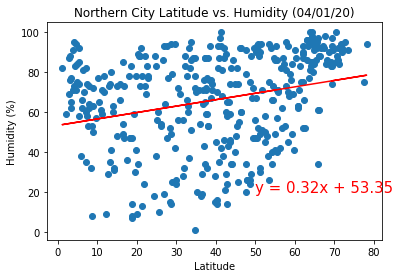

The r-squared is: 0.07388817251031655


<Figure size 432x288 with 0 Axes>

In [17]:
# Perform a linear regression on max temp versus latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"], northern_df["Humidity"])

# Create equation of line to calculate predicted max temp
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(northern_df["Lat"],northern_df["Humidity"])
plt.plot(northern_df["Lat"],regress_values,"-", color="r")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.title("Northern City Latitude vs. Humidity (04/01/20)")
plt.show()

print(f"The r-squared is: {rvalue**2}")

# Save image as PNG
plt.savefig("Fig7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

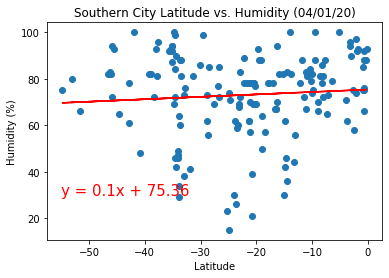

The r-squared is: 0.005988488047800114
These charts show the very slight positive correlations between city latitude and humidity.


<Figure size 432x288 with 0 Axes>

In [18]:
# Perform a linear regression on max temp versus latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"], southern_df["Humidity"])

# Create equation of line to calculate predicted max temp
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(southern_df["Lat"],southern_df["Humidity"])
plt.plot(southern_df["Lat"],regress_values,"-", color="r")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.title("Southern City Latitude vs. Humidity (04/01/20)")
plt.show()

print(f"The r-squared is: {rvalue**2}")

# Brief analysis
print("These charts show the very slight positive correlations between city latitude and humidity.")

# Save image as PNG
plt.savefig("Fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

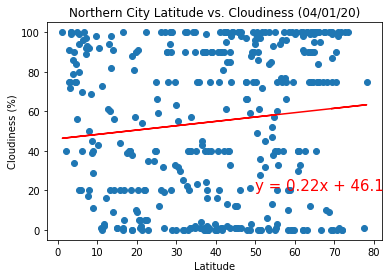

The r-squared is: 0.01323255332972582


<Figure size 432x288 with 0 Axes>

In [19]:
# Perform a linear regression on max temp versus latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"], northern_df["Cloudiness"])

# Create equation of line to calculate predicted max temp
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(northern_df["Lat"],northern_df["Cloudiness"])
plt.plot(northern_df["Lat"],regress_values,"-", color="r")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.title("Northern City Latitude vs. Cloudiness (04/01/20)")
plt.show()

print(f"The r-squared is: {rvalue**2}")

# Save image as PNG
plt.savefig("Fig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

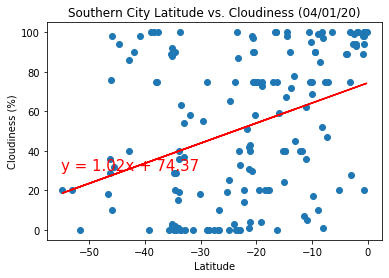

The r-squared is: 0.13138737416498159
These charts show the very slight positive correlations between city latitude and cloudiness. The relationship is slightly stronger in the northern hemisphere.


<Figure size 432x288 with 0 Axes>

In [20]:
# Perform a linear regression on max temp versus latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"], southern_df["Cloudiness"])

# Create equation of line to calculate predicted max temp
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(southern_df["Lat"],southern_df["Cloudiness"])
plt.plot(southern_df["Lat"],regress_values,"-", color="r")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.title("Southern City Latitude vs. Cloudiness (04/01/20)")
plt.show()

print(f"The r-squared is: {rvalue**2}")

# Brief analysis
print("These charts show the very slight positive correlations between city latitude and cloudiness. The relationship is slightly stronger in the northern hemisphere.")

# Save image as PNG
plt.savefig("Fig10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

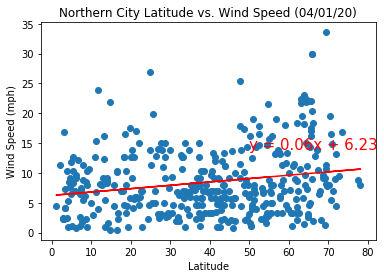

The r-squared is: 0.04067436752207115


<Figure size 432x288 with 0 Axes>

In [21]:
# Perform a linear regression on max temp versus latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"], northern_df["Wind Speed"])

# Create equation of line to calculate predicted max temp
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(northern_df["Lat"],northern_df["Wind Speed"])
plt.plot(northern_df["Lat"],regress_values,"-", color="r")
plt.annotate(line_eq,(50,14),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.title("Northern City Latitude vs. Wind Speed (04/01/20)")
plt.show()

print(f"The r-squared is: {rvalue**2}")

# Save image as PNG
plt.savefig("Fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

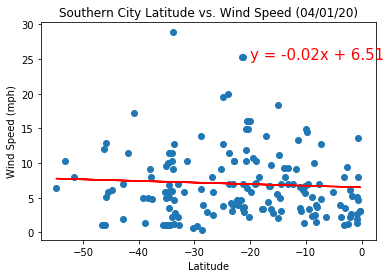

The r-squared is: 0.0034509490199279205
These charts show that as you move away from the equator (larger & smaller latitudes), it tends to get windier.


<Figure size 432x288 with 0 Axes>

In [23]:
# Perform a linear regression on max temp versus latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"], southern_df["Wind Speed"])

# Create equation of line to calculate predicted max temp
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(southern_df["Lat"],southern_df["Wind Speed"])
plt.plot(southern_df["Lat"],regress_values,"-", color="r")
plt.annotate(line_eq,(-20,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.title("Southern City Latitude vs. Wind Speed (04/01/20)")
plt.show()

print(f"The r-squared is: {rvalue**2}")

# Brief analysis
print("These charts show that as you move away from the equator (larger & smaller latitudes), it tends to get windier.")

# Save image as PNG
plt.savefig("Fig12.png")